In [2]:
#!pip install albumentations

In [3]:
import albumentations as A # https://github.com/albumentations-team/albumentations
import cv2
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

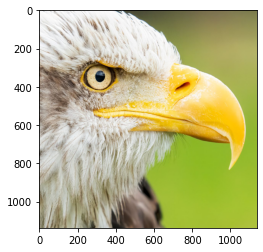

In [4]:
# Read an image with OpenCV and convert it to the RGB colorspace
image = cv2.imread("bird.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [7]:
print(image.shape)

(1138, 1138, 3)


In [25]:
# Declare an augmentation pipeline
transforms = A.Compose([
    #A.RandomCrop(width=120, height=120),
    A.Blur(blur_limit=20, p=1.0),
    A.RandomBrightnessContrast(p=0.9),
    A.ToGray(p=0.5),
    A.MotionBlur(blur_limit=15, p=1.0)
])

In [19]:
# Examples for segmentation: https://albumentations.ai/docs/examples/example_kaggle_salt/
for i in range(5):
  # Augment an image
  transformed = transforms(image=image)
  transformed_image = transformed["image"]
  plt.figure(figsize=(15, 15))
  plt.subplot(1, 2, 1)
  plt.title('Original Image')
  plt.imshow(image)
  plt.subplot(1, 2, 2)
  plt.title('Transformed Image')
  plt.imshow(transformed_image)
  plt.show()
  plt.close()

Output hidden; open in https://colab.research.google.com to view.

In [20]:
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True, )

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteG01RHW/oxford_iiit_pet-train.tfrecord


  0%|          | 0/3680 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteG01RHW/oxford_iiit_pet-test.tfrecord


  0%|          | 0/3669 [00:00<?, ? examples/s]

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


In [ ]:
# dataset['train'] # 3,680 samples

In [26]:
for idx, img in enumerate(dataset['train']):

  if idx < 10:
    # https://albumentations.ai/docs/getting_started/mask_augmentation/
    print(type(img['image'].numpy()))
    print(type(img['segmentation_mask'].numpy()))
    transformed = transforms(image=img['image'].numpy(), mask=img['segmentation_mask'].numpy())
    transformed_image = transformed["image"]
    transformed_mask = transformed['mask'][...,0]

    plt.figure(figsize=(15, 15))
    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(img['image'].numpy())
    plt.subplot(1, 3, 2)
    plt.title('Transformed Image')
    plt.imshow(transformed_image)
    plt.subplot(1, 3, 3)
    plt.title('Transformed Mask')
    plt.imshow(transformed_mask)
    plt.show() 
    plt.close() 

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Examples using TensorFlow: https://medium.com/ymedialabs-innovation/how-to-use-dataset-and-iterators-in-tensorflow-with-code-samples-3bb98b6b74ab